This is an example how to create signals with scipy

In [103]:
import numpy as np
from scipy import signal, misc
from scipy.fftpack import fft, ifft
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import normalize
from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline

### Generate a sawtooth

In [3]:
Fs = 20000 # sample rate 
Freq = 4000 # frequency
samples = 512 # samples
t = np.linspace(0, 1/Fs * samples, samples) # generate samples
saw = signal.sawtooth(2 * np.pi * Freq * t)
# saw = np.sin(2 * np.pi * Freq * t)

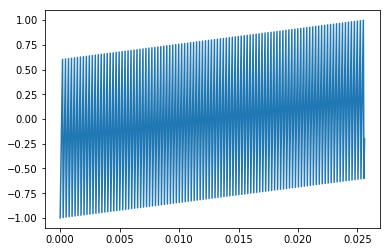

In [4]:
 plt.plot(t, saw)

#### Compute fft

In [5]:
y = fft(saw)

(0, 1)

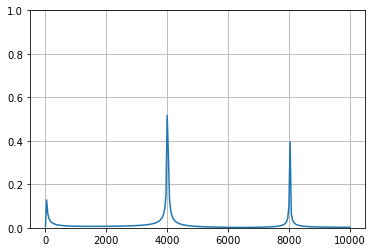

In [6]:
# Get the real part
y_real = 2/samples * np.abs(y[0:samples//2])
# and plot
xf = np.linspace(0.0, 1.0/(2 * 1/Fs), samples//2)
plt.plot(xf, y_real)
plt.grid()
plt.ylim(0,1)


### Generate a butterworth filter

In [16]:
# Helper functions
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = signal.lfilter(b, a, data)
    return y

def plot_fft(s, samps, color='b-'):
    y2_fft = fft(s)
    y2_fft_real = 2/samps * np.abs(y2_fft[0:samps//2]) # Get Real part
#     plt.plot(xf, y_real, 'g-')
    plt.plot(xf, y2_fft_real, color)
    
def get_real_norm_fft(s, samps):
    return 2/samps * np.abs(fft(s)[0:samps//2])

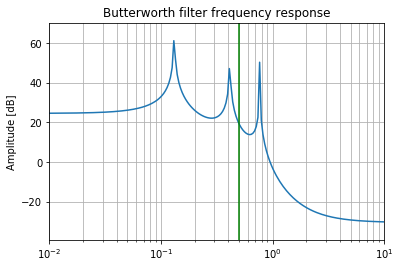

In [8]:
# TODO: Somehow if 'analog' is set to true the filtering is really weird
cutoff = 5000
nyq =  Fs * 0.5
normal_cutoff = cutoff / nyq
b, a = signal.butter(6, normal_cutoff, btype='low', analog=False)
w, h = signal.freqs(b, a)
plt.plot(w, 20 * np.log10(abs(h)))
plt.xscale('log')
# plt.xlim(0, 0.5*Fs)
plt.title('Butterworth filter frequency response')
# plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(normal_cutoff, color='green') # cutoff frequency

### Filter the signal

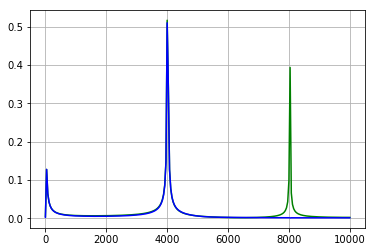

In [9]:
out = signal.lfilter(b, a, saw)
# plt.plot(out)
# print(out)
y_out = fft(out)
y_out_real = 2/samples * np.abs(y_out[0:samples//2]) # Get Real part
plt.plot(xf, y_real, 'g-')
plt.plot(xf, y_out_real, 'b-')
plt.grid()
# axes = plt.gca()
# axes.set_xlim([xmin,xmax])
# axes.set_ylim([0,0])
# plt.plot( np.abs(y_out[0:samples//2]))

(0, 1)

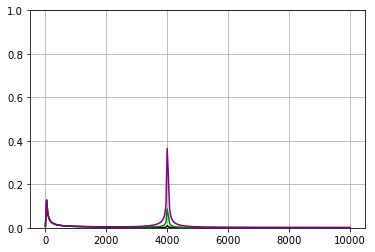

In [10]:
y2 = butter_lowpass_filter(saw, 2000, Fs)
y4 = butter_lowpass_filter(saw, 3000, Fs)
y6 = butter_lowpass_filter(saw, 4000, Fs)
plot_fft(y2, samples, color='black')
plot_fft(y4, samples, color='green')
plot_fft(y6, samples, color='purple')
plt.grid()
plt.ylim(0,1)

### Generate an array with signals using different cutoff parameters

In [18]:
maxRange = 10000
stepSize = 100
steps = np.linspace(100, maxRange, stepSize)

filtered_signals = []
for i,step in enumerate(steps):
    y = butter_lowpass_filter(saw, step, Fs)
    filtered_signals.append(get_real_norm_fft(y,samples))
# filtered_signals[5]


In [122]:
# freq_index = list(map(lambda x: x==4100, steps))
# freq = 5000
# freq_index = int(np.where(steps==freq)[0])
# plot_fft(filtered_signals[freq_index], samples)
# plt.plot(xf,filtered_signals[freq_index])
# plt.grid()
# plt.ylim(0, 1)

Selected Bin : 179


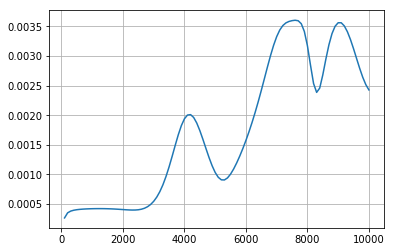

In [187]:
# plot the value of bin 4000 across the diffrent param values
freq = 7000
# range is 10000 or Fs/2 which corresponds to 512 bins
sbin = int(freq / (Fs * 0.5) * samples/2) # truncate
print("Selected Bin :", sbin)
filtered_signals = np.array(filtered_signals)
# fft()
bin_grow = filtered_signals[:,sbin]
plt.plot(steps, bin_grow)
# print(bin_grow.shape)
plt.grid()
# print(min(bin_grow))
# plot_fft(filtered_signals[30], samples)

### Poly regresssion

In [ ]:
# preprocessing
X = steps / 10000 # from 0.1 to 1

poly = PolynomialFeatures(degree=12)
flattened_arr = X.reshape(-1, 1)
X_ = poly.fit_transform(flattened_arr)
predict_ = poly.fit_transform(1)
# print(X_)
# print(predict_)
print(bin_grow.shape)
clf = linear_model.LinearRegression()
clf.fit(X_, bin_grow)

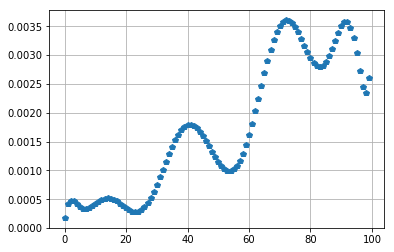

In [190]:
pred_ = clf.predict(X_)
plt.plot(pred_, 'p')
plt.grid()
# plt.ylim(0,0.0035)
# flattened_arr

### 2nd Method - cutoff with filter response as input
- In principle we will use the frequency response of the filter given a particular parameter and use this as the input for our algorithm